## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  19.685389   773.022579  0.762657  7.024966  1.630593
1  46.242903   596.832868  0.757523  1.755809  1.515771
2  70.481911   245.873292  0.417631  2.262573  0.902687
3  73.295248  1200.895776  0.706365  8.576725  1.638283
4  37.387591   357.756822  0.468013  7.955111  1.320905


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8776268	total: 57.5ms	remaining: 57.4s
1:	learn: 0.8688623	total: 57.9ms	remaining: 28.9s
2:	learn: 0.8602884	total: 58.4ms	remaining: 19.4s
3:	learn: 0.8525623	total: 58.9ms	remaining: 14.7s
4:	learn: 0.8441970	total: 59.4ms	remaining: 11.8s
5:	learn: 0.8360662	total: 59.9ms	remaining: 9.92s
6:	learn: 0.8271403	total: 60.2ms	remaining: 8.54s
7:	learn: 0.8191342	total: 60.7ms	remaining: 7.53s
8:	learn: 0.8120184	total: 61.3ms	remaining: 6.75s
9:	learn: 0.8046413	total: 61.9ms	remaining: 6.13s
10:	learn: 0.7967051	total: 62.4ms	remaining: 5.61s
11:	learn: 0.7894349	total: 62.8ms	remaining: 5.17s
12:	learn: 0.7799854	total: 63.2ms	remaining: 4.8s
13:	learn: 0.7733621	total: 63.7ms	remaining: 4.49s
14:	learn: 0.7665823	total: 64.2ms	remaining: 4.22s
15:	learn: 0.7596451	total: 64.7ms	remaining: 3.98s
16:	learn: 0.7519997	total: 65.2ms	remaining: 3.77s
17:	learn: 0.7449520	total: 65.5ms	remaining: 3.57s
18:	learn: 0.7360646	total: 65.7ms	remaining:

116:	learn: 0.3236604	total: 107ms	remaining: 805ms
117:	learn: 0.3217072	total: 107ms	remaining: 802ms
118:	learn: 0.3193951	total: 108ms	remaining: 798ms
119:	learn: 0.3173578	total: 108ms	remaining: 795ms
120:	learn: 0.3153631	total: 109ms	remaining: 790ms
121:	learn: 0.3136376	total: 109ms	remaining: 786ms
122:	learn: 0.3114694	total: 110ms	remaining: 782ms
123:	learn: 0.3092583	total: 110ms	remaining: 777ms
124:	learn: 0.3064947	total: 110ms	remaining: 773ms
125:	learn: 0.3043535	total: 111ms	remaining: 768ms
126:	learn: 0.3023790	total: 111ms	remaining: 764ms
127:	learn: 0.3004128	total: 112ms	remaining: 761ms
128:	learn: 0.2984864	total: 112ms	remaining: 756ms
129:	learn: 0.2963111	total: 112ms	remaining: 750ms
130:	learn: 0.2942471	total: 113ms	remaining: 746ms
131:	learn: 0.2920878	total: 113ms	remaining: 741ms
132:	learn: 0.2903708	total: 113ms	remaining: 738ms
133:	learn: 0.2885013	total: 114ms	remaining: 734ms
134:	learn: 0.2866165	total: 114ms	remaining: 731ms
135:	learn: 

299:	learn: 0.1282873	total: 186ms	remaining: 433ms
300:	learn: 0.1276468	total: 186ms	remaining: 433ms
301:	learn: 0.1270874	total: 187ms	remaining: 432ms
302:	learn: 0.1267845	total: 187ms	remaining: 431ms
303:	learn: 0.1260298	total: 188ms	remaining: 430ms
304:	learn: 0.1252681	total: 188ms	remaining: 428ms
305:	learn: 0.1248469	total: 188ms	remaining: 427ms
306:	learn: 0.1242015	total: 189ms	remaining: 426ms
307:	learn: 0.1235175	total: 189ms	remaining: 425ms
308:	learn: 0.1229288	total: 190ms	remaining: 424ms
309:	learn: 0.1223101	total: 190ms	remaining: 423ms
310:	learn: 0.1217045	total: 190ms	remaining: 422ms
311:	learn: 0.1211848	total: 191ms	remaining: 421ms
312:	learn: 0.1206089	total: 191ms	remaining: 420ms
313:	learn: 0.1200658	total: 192ms	remaining: 419ms
314:	learn: 0.1195025	total: 192ms	remaining: 418ms
315:	learn: 0.1189533	total: 192ms	remaining: 416ms
316:	learn: 0.1183822	total: 193ms	remaining: 416ms
317:	learn: 0.1177631	total: 193ms	remaining: 414ms
318:	learn: 

544:	learn: 0.0620938	total: 289ms	remaining: 241ms
545:	learn: 0.0619569	total: 289ms	remaining: 240ms
546:	learn: 0.0619104	total: 289ms	remaining: 240ms
547:	learn: 0.0617306	total: 290ms	remaining: 239ms
548:	learn: 0.0616242	total: 291ms	remaining: 239ms
549:	learn: 0.0614482	total: 291ms	remaining: 238ms
550:	learn: 0.0612415	total: 291ms	remaining: 238ms
551:	learn: 0.0611054	total: 292ms	remaining: 237ms
552:	learn: 0.0608666	total: 292ms	remaining: 236ms
553:	learn: 0.0607343	total: 293ms	remaining: 236ms
554:	learn: 0.0605279	total: 293ms	remaining: 235ms
555:	learn: 0.0603048	total: 294ms	remaining: 235ms
556:	learn: 0.0601759	total: 294ms	remaining: 234ms
557:	learn: 0.0599429	total: 295ms	remaining: 233ms
558:	learn: 0.0597162	total: 295ms	remaining: 233ms
559:	learn: 0.0595948	total: 296ms	remaining: 232ms
560:	learn: 0.0595253	total: 296ms	remaining: 232ms
561:	learn: 0.0592998	total: 297ms	remaining: 231ms
562:	learn: 0.0590894	total: 297ms	remaining: 231ms
563:	learn: 

726:	learn: 0.0377793	total: 368ms	remaining: 138ms
727:	learn: 0.0376676	total: 368ms	remaining: 138ms
728:	learn: 0.0375858	total: 369ms	remaining: 137ms
729:	learn: 0.0374767	total: 369ms	remaining: 137ms
730:	learn: 0.0373963	total: 369ms	remaining: 136ms
731:	learn: 0.0372897	total: 370ms	remaining: 135ms
732:	learn: 0.0372109	total: 370ms	remaining: 135ms
733:	learn: 0.0371432	total: 370ms	remaining: 134ms
734:	learn: 0.0370252	total: 371ms	remaining: 134ms
735:	learn: 0.0369998	total: 371ms	remaining: 133ms
736:	learn: 0.0369332	total: 372ms	remaining: 133ms
737:	learn: 0.0368171	total: 372ms	remaining: 132ms
738:	learn: 0.0367333	total: 373ms	remaining: 132ms
739:	learn: 0.0366194	total: 373ms	remaining: 131ms
740:	learn: 0.0365505	total: 374ms	remaining: 131ms
741:	learn: 0.0364830	total: 374ms	remaining: 130ms
742:	learn: 0.0363713	total: 375ms	remaining: 130ms
743:	learn: 0.0362687	total: 375ms	remaining: 129ms
744:	learn: 0.0361588	total: 376ms	remaining: 129ms
745:	learn: 

956:	learn: 0.0214820	total: 471ms	remaining: 21.2ms
957:	learn: 0.0214409	total: 472ms	remaining: 20.7ms
958:	learn: 0.0213654	total: 472ms	remaining: 20.2ms
959:	learn: 0.0213214	total: 473ms	remaining: 19.7ms
960:	learn: 0.0212782	total: 473ms	remaining: 19.2ms
961:	learn: 0.0212049	total: 474ms	remaining: 18.7ms
962:	learn: 0.0211632	total: 474ms	remaining: 18.2ms
963:	learn: 0.0211298	total: 474ms	remaining: 17.7ms
964:	learn: 0.0210541	total: 475ms	remaining: 17.2ms
965:	learn: 0.0209946	total: 475ms	remaining: 16.7ms
966:	learn: 0.0209549	total: 476ms	remaining: 16.2ms
967:	learn: 0.0208851	total: 476ms	remaining: 15.7ms
968:	learn: 0.0208167	total: 476ms	remaining: 15.2ms
969:	learn: 0.0207758	total: 477ms	remaining: 14.7ms
970:	learn: 0.0207363	total: 477ms	remaining: 14.2ms
971:	learn: 0.0206809	total: 478ms	remaining: 13.8ms
972:	learn: 0.0206088	total: 478ms	remaining: 13.3ms
973:	learn: 0.0205419	total: 478ms	remaining: 12.8ms
974:	learn: 0.0204900	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

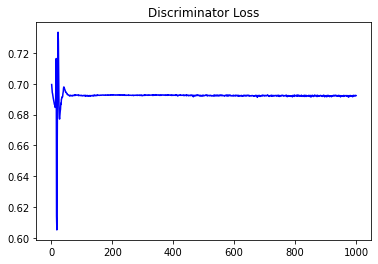

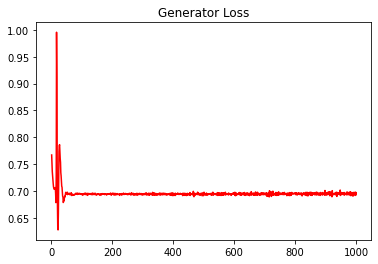

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.627686947755254


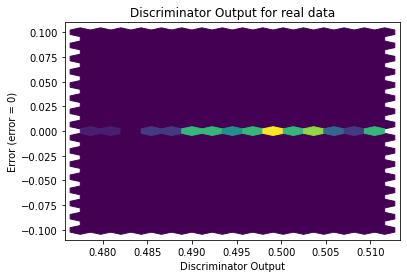

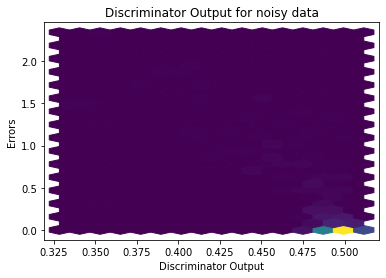

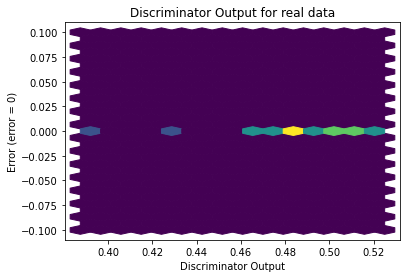

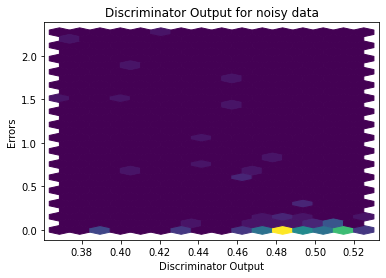

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


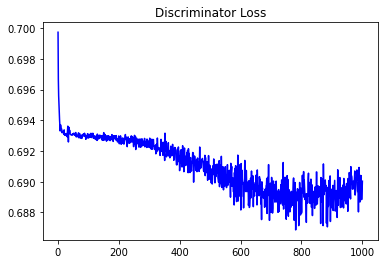

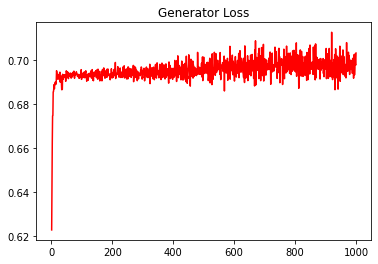

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.666141093923812


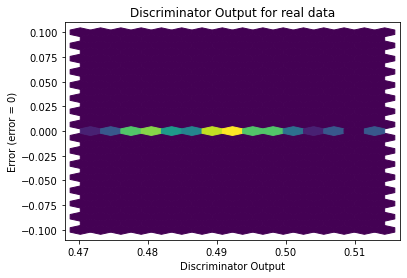

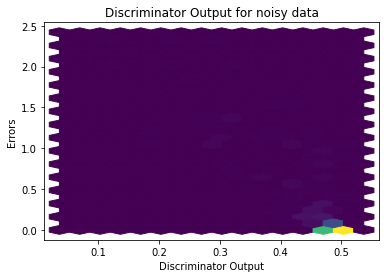

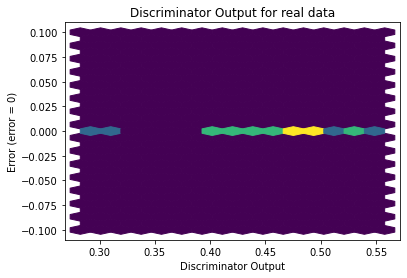

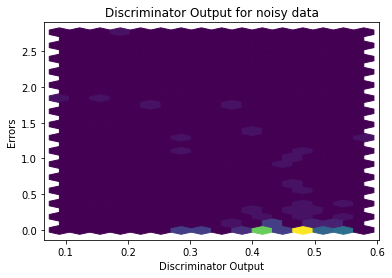

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3496]], requires_grad=True)
